# Contraintes discontinues et Piecewize avec différents solveurs.

# Sommaire :

- Problème pratique de contraintes discontinues.
- Dessiner les contraintes discontinues avec Matplot.
- Résoudre le Problème pratique discontinu Avec Cplex
- Problème pratique de contraintes piecewize.
- Dessiner les contraintes Piecewize avec Matplot
- Résoudre le Problème pratique Piecewize Avec Cplex
- Résoudre le Problème pratique Piecewize Avec Pulp
- Résoudre le Problème pratique Piecewize Avec Gekko
- Résoudre le Problème pratique Piecewize Avec Excel
- Résoudre le Problème pratique Piecewize Avec Cvxopt


!! Création en cours !!

Etude fournie pas Estelle Derrien - Github estelle15000

# Problème pratique de contraintes discontinues.

Mon usine produit 2 objets A et B.

- Si la production de A > 0, alors le côut de production est de 20
- Si la production de A > 200, alors le côut de production est de 30
- Si la production de A > 300, alors le côut de production est de 50


# Dessiner les contraintes conditionnelles discontinues avec Matplot

Ibm Cplex appelle ça les contraintes de coût discontinues .

Ils ont un exemple ici :
https://www.ibm.com/docs/en/icos/20.1.0?topic=expressions-discontinuous-piecewise-linear-functions

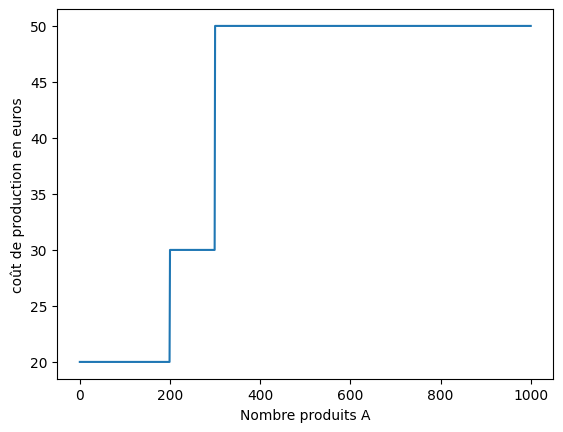

In [5]:
# On visualise nos contraintes de type conditionnelles  avec les valeurs réelles de notre problème
# Edit, peut-on qualifier ça de piecewize, pas selon la doc Cplex .
import matplotlib.pyplot as plt
plt.plot([0, 199, 200, 299,300,1000], [20,20,30, 30, 50 ,50])
plt.xlabel('Nombre produits A')
plt.ylabel('coût de production en euros')
plt.show()

# Dessiner les contraintes Piecewize avec Matplot

Hypothèse : La différence, avec les contraintes piecewize, c'est que ce sont des fonctions  linéaires qui décrivent l'évolution des coûts et pas des valeurs-seuils fixes.
On pourrait imaginer de les affecter dans l'optimisation, en fonction de leurs valeurs "breaking points". Reste à voir comment faire dans les solveurs , et si la logique reste valable en comparant avec ce que font les autres.

Hypothèse2 : Le but est de switcher en fonction des breaking point, afin que l'optimisation globale reste linéaire.
On décompose une fonction convexe en plusieurs parties linéaires selon une méthode précise, voir la documentation.

Hypothèse3 : Vu que Gekko est non linéaire, on pourrait même avoir des fonctions non linéaire dans ce système mais ce n'est pas le but( Voir l'optimisation " Pricing de 1 produit " ).







Voici un exemple, elles peuvent aussi être discontinues comme sur le dessin (Doc Cplex) :

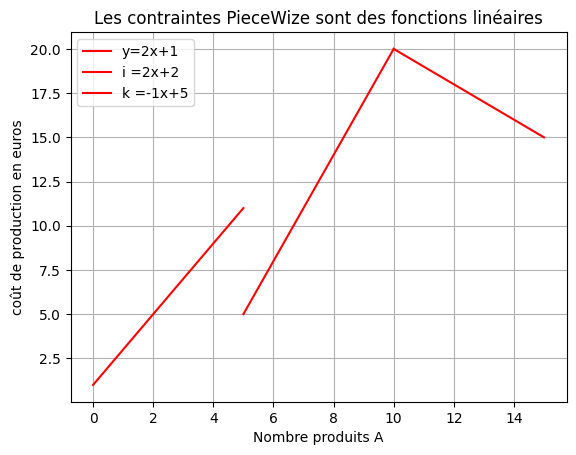

In [6]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0,5,100)
m = np.linspace(5,10,100)
t = np.linspace(10,15,100)
y = 2*x+1
i = 3*x+5
k = -1*x+20
plt.plot(x, y, '-r', label='y=2x+1')
plt.plot(m, i, '-r', label='i =2x+2')
plt.plot(t, k, '-r', label='k =-1x+5')
plt.title('Les contraintes PieceWize sont des fonctions linéaires')
plt.xlabel('Nombre produits A')
plt.ylabel('coût de production en euros')
plt.legend(loc='upper left')
plt.grid()
plt.show()



# Problème pratique avec Cplex

